/tmp/ipykernel_215029/723026787.py:11: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  data = np.random.multivariate_normal(mean, cov_matrix, n_points)


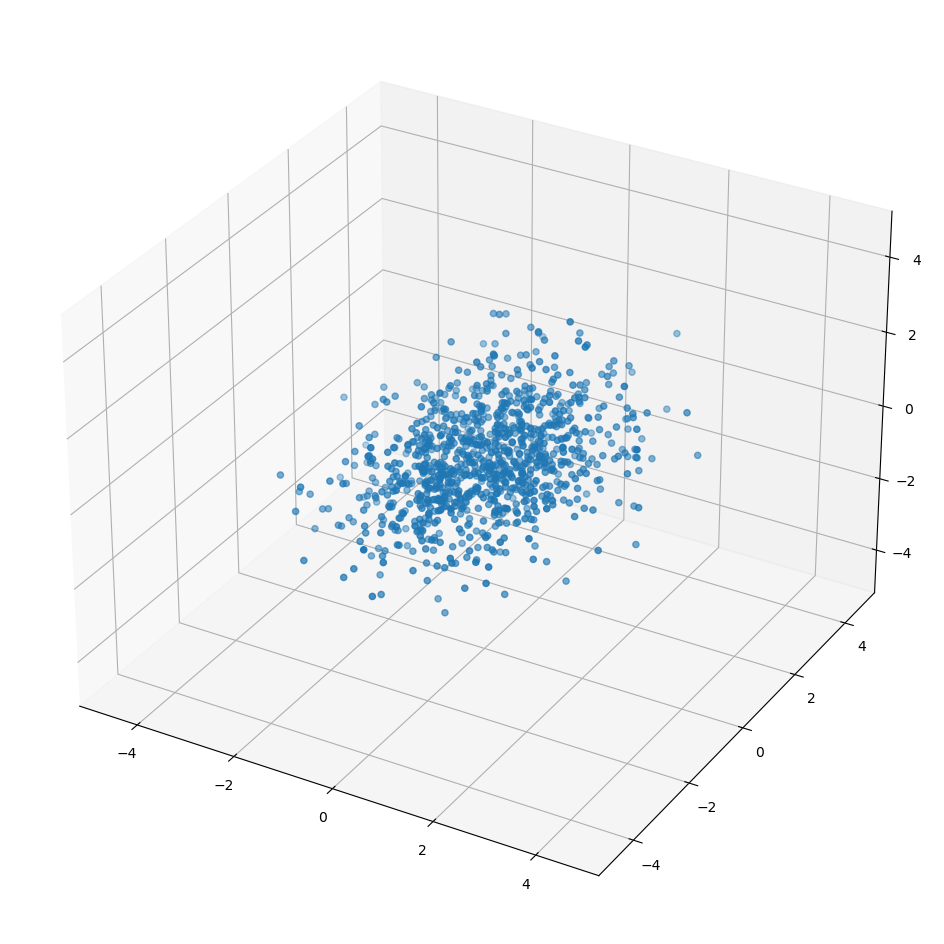

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

n_points = 1000
mean = [0, 0, 0]
cov_matrix = [[0.1, 0.9, 0.9], [0.9, 0.1, 0.9], [0.9, 0.9, 0.1]]

np.random.seed(0)
data = np.random.multivariate_normal(mean, cov_matrix, n_points)

fig = plt.figure(figsize=(12, 12)) 
ax = fig.add_subplot(111, projection='3d')

ax.set_xlim([-5, 5])
ax.set_ylim([-5, 5])
ax.set_zlim([-5, 5])

ax.scatter(data[:, 0], data[:, 1], data[:, 2])
plt.show()


In [19]:
print(data)

[[-1.69610592 -0.63874741 -1.87676392]
 [-3.14722458 -1.7195021  -0.4833325 ]
 [-0.64556599 -0.87665084 -0.74608817]
 ...
 [ 0.69626529  1.30945759  1.10567242]
 [-1.77310454 -0.0694125   1.07845127]
 [ 1.03861588 -0.34060354 -0.23865359]]


In [17]:
print(data[0:5,])

[[-1.69610592 -0.63874741 -1.87676392]
 [-3.14722458 -1.7195021  -0.4833325 ]
 [-0.64556599 -0.87665084 -0.74608817]
 [-0.43195805  0.6455971  -1.19392954]
 [-0.69450976 -0.2804977  -0.84194521]]


In [18]:
print(data[0:5, 1])

[-0.63874741 -1.7195021  -0.87665084  0.6455971  -0.2804977 ]


In [6]:
print(data[0:5])

[[-7.57928437e-01 -2.02394750e+00 -1.26244175e+00]
 [-8.96895108e-01  3.15855933e-01 -1.35297798e-03]
 [ 3.09454185e-02  5.80952171e-01  4.45157354e-01]
 [-4.91901208e-01 -2.93811839e-02  4.50882856e-01]
 [-5.00725087e-01  9.00219793e-01  3.40378511e-01]]


Главные компоненты:
[[ 0.55971151  0.59918482  0.57245138]
 [ 0.79899654 -0.20694656 -0.56460397]
 [ 0.21983528 -0.77340202  0.59457697]]
Дисперсия, объясненная каждой компонентой:
[1.70828653 0.79174894 0.74971377]


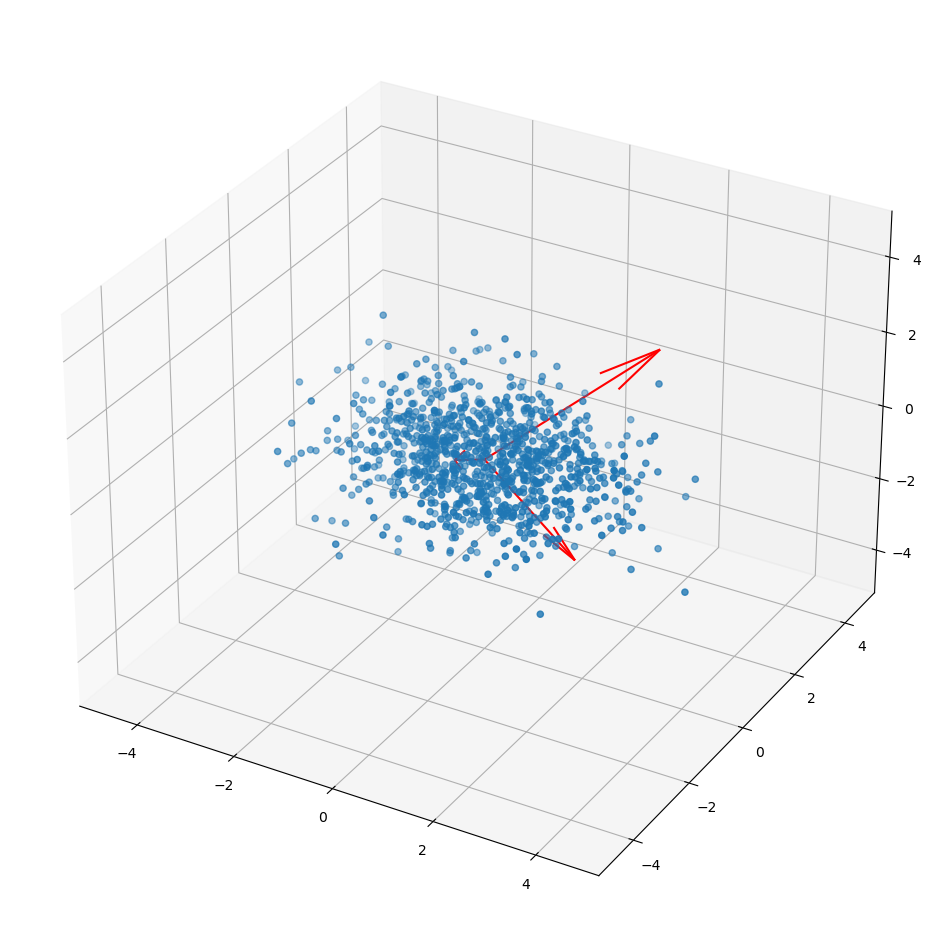

In [9]:
# Выполнение PCA
pca = PCA(n_components=3)
X_pca_data = pca.fit_transform(data)

# Получение главных компонент (главных осей)
components = pca.components_
explained_variance = pca.explained_variance_

print("Главные компоненты:")
print(components)

print("Дисперсия, объясненная каждой компонентой:")
print(explained_variance)

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')

ax.set_xlim([-5, 5])
ax.set_ylim([-5, 5])
ax.set_zlim([-5, 5])

ax.scatter(X_pca_data[:, 0], X_pca_data[:, 1], X_pca_data[:, 2])

for length, vector in zip(explained_variance, components):
    v = vector * 3 * np.sqrt(length)
    ax.quiver(mean[0], mean[1], mean[2], v[0], v[1], v[2], color='r')

plt.show()


In [11]:
pca.get_covariance()

array([[1.0768476 , 0.31452666, 0.28817126],
       [0.31452666, 1.09566314, 0.33370597],
       [0.28817126, 0.33370597, 1.0772385 ]])

In [8]:
np.cov(pca.fit_transform(data), rowvar=False)

array([[ 1.70828653e+00,  1.70700958e-16,  3.24509633e-16],
       [ 1.70700958e-16,  7.91748935e-01, -1.52030540e-16],
       [ 3.24509633e-16, -1.52030540e-16,  7.49713771e-01]])

In [9]:
data_[0:5]

array([[ 2.2935839 , -0.84223903, -0.21364457],
       [ 0.26029979,  0.87453629, -0.16096624],
       [-0.67487487,  0.37813692, -0.06313189],
       [-0.03163581,  0.36944836, -0.54487478],
       [-0.50309765,  0.98133693, -0.01594834]])